In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Other Clustering Methods

- [DBSCAN](#1.-DBSCAN)
- [Agglomerative clustering](#2.-Agglomerative-clustering)
- [Gaussian Mixtures](#3.-Gaussian-Mixtures)

## 1. DBSCAN

Density-based spatial clustering of applications with noise (DBSCAN) is a clustering algorithm that works well if all the clusters are dense enough and if they are well separated by low-density regions.

There are two parameters to the algorithm, `min_samples` and `eps`, which define formally what we mean when we say dense.

DBSCAN:
    
- $\epsilon$-neighborhoods: For each data point, DBSCAN counts how many points are located within a distance `eps`.
- Core data points: If a data point has at least `min_samples` points in its $\epsilon$-neighborhood, then it is considered a **core point**.
- Clusters: all points in the neighborhood of a core point belong to the same cluster. 


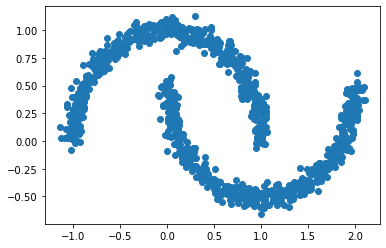

In [2]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 1000,
                 noise = 0.05)

plt.scatter(X[:,0],X[:,1])

In [3]:
from sklearn.cluster import DBSCAN

In [4]:
dbscan = DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(X)
# cluster labels (label = -1 means that the point is considered an anomaly)
labels = dbscan.labels_
# core points
cores = dbscan.components_

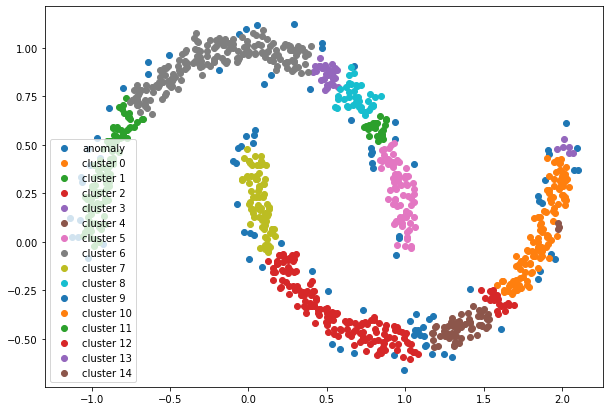

In [5]:
plt.figure(figsize=(10,7))
for i in np.unique(labels):
    if i!=-1:
        plt.scatter(X[labels==i,0],X[labels==i,1], label='cluster '+str(i))
    else:
        plt.scatter(X[labels==i,0],X[labels==i,1], label='anomaly')
plt.legend()

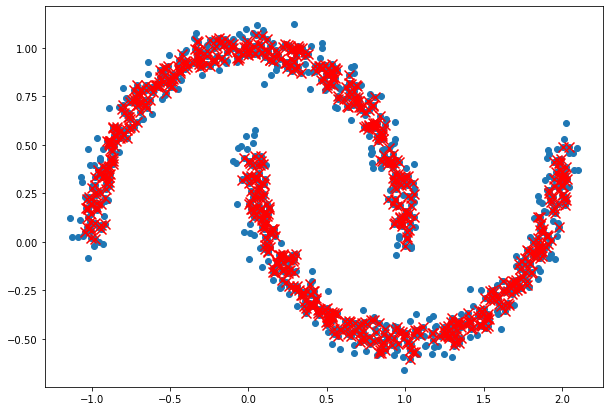

In [6]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1])
plt.scatter(cores[:,0],cores[:,1],s=100,marker='x',color='red')

In [7]:
dbscan = DBSCAN(eps=0.2,min_samples=5)
dbscan.fit(X)
# cluster labels (label = -1 means that the point is considered an anomaly)
labels = dbscan.labels_
# core points
cores = dbscan.components_

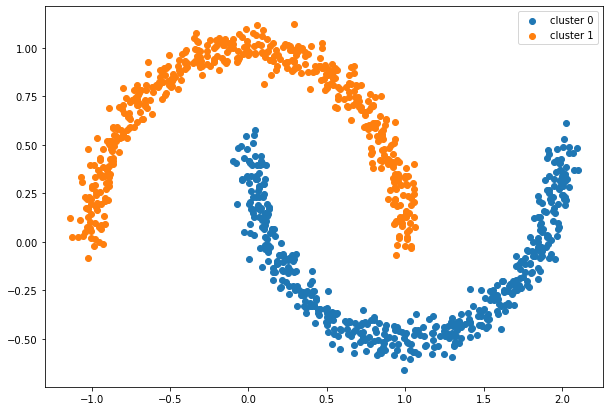

In [8]:
plt.figure(figsize=(10,7))
for i in np.unique(labels):
    if i!=-1:
        plt.scatter(X[labels==i,0],X[labels==i,1], label='cluster '+str(i))
    else:
        plt.scatter(X[labels==i,0],X[labels==i,1], label='anomaly')
plt.legend()

**DBSCAN pros and cons**:

**Pros:**
- does not require to specify number of clusters beforehand.
- Performs well with arbitrary shapes clusters.
- DBSCAN is robust to outliers and able to detect the outliers.

**Cons:**
- determining an appropriate distance of neighborhood (eps) is not easy and it requires domain knowledge.
- it does not generalize well to clusters with much different densities.

## 2. Agglomerative clustering

A hierarchy of clusters is built from the bottom up.
 Each data point is assumed to be a separate cluster at first. Then the similar clusters are iteratively combined.
 There are 4 different methods implemented in scikit-learn to measure the similarity:
- Ward’s linkage: Minimizes the variance of the clusters being merged. Least increase in total variance around cluster centroids is aimed.
- Average linkage: Average distance of each data point in two clusters.
- Complete (maximum) linkage: Maximum distance among all data points in two clusters.
- Single (minimum) linkage: Maximum distance among all data points in two clusters.

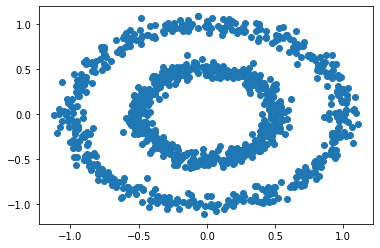

In [9]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=1000, noise=0.05, factor=0.5)
plt.scatter(X[:,0],X[:,1])

In [10]:
from sklearn.cluster import AgglomerativeClustering

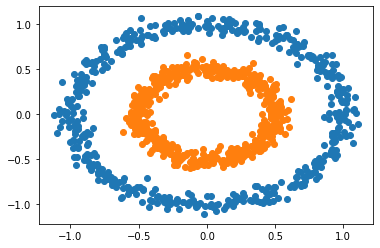

In [11]:
# linkage = ‘ward’, ‘complete’, ‘average’, or ‘single’}
k = 2
aggclt = AgglomerativeClustering(n_clusters = k, linkage='single')
aggclt.fit(X)
# cluster labels
labels = aggclt.labels_
# plot clusters
for i in range(k):
    plt.scatter(X[labels==i,0],X[labels==i,1])

## Hierarchical Clustering Dendrogram

It’s possible to visualize the tree representing the hierarchical merging of clusters as a dendrogram. Visual inspection can often be useful for understanding the structure of the data, though more so in the case of small sample sizes.

In [12]:
import pandas as pd

In [13]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
X = iris.drop('species',axis=1)

In [15]:
iris.species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [16]:
k = 3
aggclt = AgglomerativeClustering(n_clusters=k,linkage='average')

In [17]:
aggclt.fit(X)
labels = aggclt.labels_

In [18]:
# clusters = species?
pd.crosstab(labels, iris.species)

species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
0,0,50,14
1,50,0,0
2,0,0,36


In [19]:
# The function below plots the corresponding dendrogram of a hierarchical
# clustering using AgglomerativeClustering and the dendrogram method available in scipy.

def plot_dendrogram(model):

    from scipy.cluster.hierarchy import dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

In [20]:
aggclt = AgglomerativeClustering(n_clusters=None, linkage='average', distance_threshold=0)
aggclt.fit(X)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

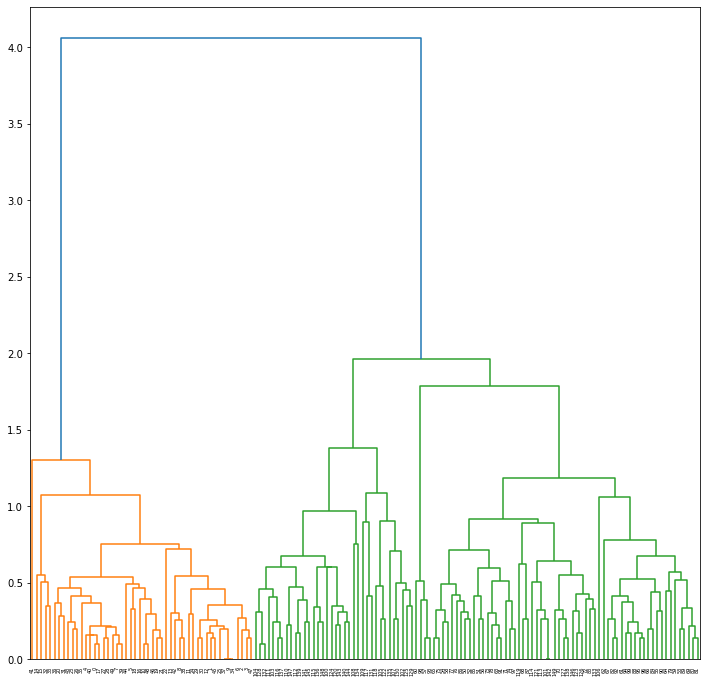

In [21]:
plt.figure(figsize=(12,12))
plot_dendrogram(aggclt)

## 3. Gaussian Mixtures

It assumes that the cluster points were generated from a mixture of Gaussian distributions.

In [2]:
from sklearn.datasets import make_blobs

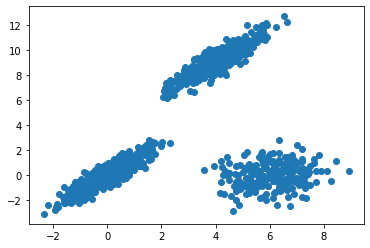

In [3]:
X1, y1 = make_blobs(n_samples=1000, centers=([0, 0], [10, 0]))
X1 = X1.dot(np.array([[0.4, 0.9], [0.7, 0.6]]))
X2, y2 = make_blobs(n_samples=250, centers=[[6,0]])
X = np.vstack((X1,X2))
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(X)

GaussianMixture(n_components=3)

Let us look at the parameters that the algorithm estimated

In [5]:
gm.weights_

array([0.20000005, 0.4       , 0.39999995])

In [6]:
np.round(gm.means_,1)

array([[ 6.1, -0.1],
       [ 4.1,  9.1],
       [-0. , -0. ]])

In [7]:
gm.covariances_

array([[[0.86219877, 0.15747828],
        [0.15747828, 0.91985987]],

       [[0.64684074, 0.79420434],
        [0.79420434, 1.20703431]],

       [[0.61872954, 0.73303967],
        [0.73303967, 1.0845871 ]]])

Gaussian Mixtures relies on the *Expectation-Maximization (EM) algorithm*

We can check whether or not the EM algorithm converged and how many iterations it took

In [53]:
gm.converged_

True

In [54]:
gm.n_iter_

3

Now that we have an estimate of the location, size, shape, orientation, and relative weight of each cluster, the model can easily assign each instance to the most likely cluster.

In [55]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

or estimate the probability that it belongs to a particular cluster.

In [8]:
gm.predict_proba(X)

array([[7.45449100e-023, 1.00000000e+000, 2.70867799e-025],
       [2.88555729e-006, 1.73737989e-021, 9.99997114e-001],
       [1.16364753e-021, 1.00000000e+000, 1.35666916e-022],
       ...,
       [1.00000000e+000, 1.90606620e-104, 3.04437954e-050],
       [1.00000000e+000, 1.74736600e-127, 6.51656635e-065],
       [1.00000000e+000, 1.00444832e-131, 5.48989396e-067]])

A Gaussian mixture model is a *generative model*. 
This means that we can sample new points from it.

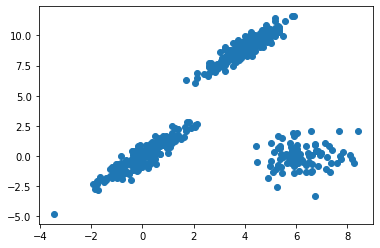

In [59]:
X_new, y_new = gm.sample(500)
plt.scatter(X_new[:,0],X_new[:,1])

It is possible to estimate the density of the model at any given location.
This is achieved using the `score_samples()` method: for each point, this method estimates the log of the *probability density function (PDF)* at the location.
The greather the score, the higher the density

In [60]:
gm.score_samples(X)

array([-2.00401213, -3.74635587, -1.85396715, ..., -4.28615467,
       -3.59245437, -7.04486115])

If you compute the exponential of these scores, you'll get the value of the PDF ath the location of the given points.

In [61]:
np.exp(gm.score_samples(X))

array([0.13479339, 0.0236036 , 0.15661462, ..., 0.01375773, 0.02753068,
       0.00087188])

Now let's plot the resulting decision boundaries (dashed lines) and density contours:

In [62]:
def plot_gaussian_mixture(model, X):
    from matplotlib.colors import LogNorm    
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
    except:
        print('something went wrong')
    
    
    resolution = 1000
    
    # create a mesh grid
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -model.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    # plot data
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    
    # plot centroids
    centroids = model.means_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=20, linewidths=8,
                color='w', zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color='r', zorder=11, alpha=1)

    plt.xlabel(feature_names[0], fontsize=15)
    plt.ylabel(feature_names[1], fontsize=15)
   

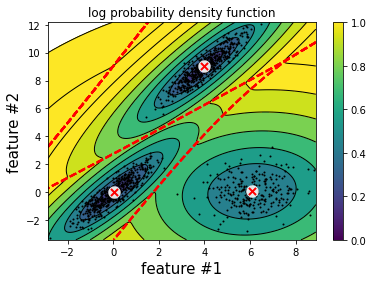

In [66]:
plt.title('log probability density function')
plot_gaussian_mixture(gm, X)
plt.colorbar()

## Anomaly detection using gaussian mixtures

Anomalies: points located in low-density regions.

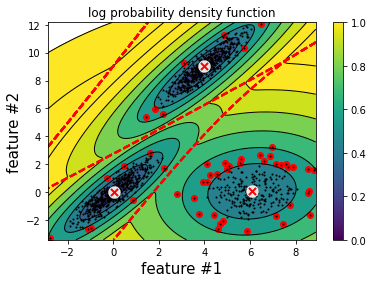

In [70]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities,4)
anomalies = X[densities<density_threshold]

plt.title('log probability density function')
plot_gaussian_mixture(gm, X)
plt.colorbar()
plt.scatter(anomalies[:,0],anomalies[:,1],color='red')